In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# you might see an error that the module "tkinter" is not installed. If on Mac Os you can install it through the terminal via "brew install python-tk@3.9". General help can as always be found on stackoverflow: "https://stackoverflow.com/questions/25905540/importerror-no-module-named-tkinter" 

np.random.seed(10)

bandit_probabilities = [0.10, 0.40, 0.10, 0.10]

number_of_bandits = len(bandit_probabilities) # = n_actions
    
action_space = np.arange(number_of_bandits) # =[0,1,2,3]

number_of_trials = 20 
timesteps = 1000

arms = np.zeros(timesteps, dtype=int)

def step(action):
    rand = np.random.random()  # [0.0,1.0)
    reward = 1.0 if (rand < bandit_probabilities[action]) else 0.0
    return reward

def compute_regret(bandit_probabilities, arms, time_steps):
    probs = [bandit_probabilities[arm] for arm in arms]
    return np.cumsum(np.ones(time_steps)) * np.amax(bandit_probabilities) - np.cumsum(probs)


def cumulative_average_mean(r, n):
    return np.cumsum(r) / np.cumsum(np.ones(n))


def plot_rewards(reward_list, n):
    for r in reward_list:
        plt.plot(cumulative_average_mean(r[0], n), linewidth=3)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    legend_str = [r[1] for r in reward_list]
    plt.legend(legend_str)
    plt.show()

def plot_regrets(regrets):
    for a in regrets:
        plt.plot(a[0], linewidth=3)
    plt.xlabel('Steps')
    plt.ylim(0.0,50.0)
    plt.ylabel('Regret')
    legend_str = [r[1] for r in regrets]
    plt.legend(legend_str)
    plt.show()

In [2]:
def apply_gradient_algo(n_bandits, action_space, n_trials, timesteps, arms, gradient_eta):
    rewards = np.zeros((len(gradient_eta), n_trials, timesteps), dtype=float)
    regrets = np.zeros((len(gradient_eta), n_trials, timesteps), dtype=float)

    for eta_counter, eta in enumerate(gradient_eta):
        for trial in range(n_trials):
            preference = np.zeros(n_bandits, dtype=float)
            r = np.zeros(timesteps, dtype=float)

            for t in range(timesteps):
                prob = np.exp(preference)/np.exp(preference).sum()
                action = np.random.choice(action_space, p=prob)

                r[t] = step(action)
                r_bar = r.sum()/(t+1) #actual_t = t-1
                preference += eta*(r[t]-r_bar)*((action_space==action)-prob)

                rewards[eta_counter, trial, t] += r[t]
                arms[t] = action
            
            regret = compute_regret(bandit_probabilities, arms, timesteps)
            regrets[eta_counter, trial, :] += regret
    
    rewards = np.mean(rewards, axis=1)
    regrets = np.mean(regrets, axis=1)

    rewards = list(rewards) 
    regrets = list(regrets)
    
    legend_entries = ["gradient policy $\eta = " + str(eta) + "$" for eta in gradient_eta] 

    rewards = list(zip(rewards, legend_entries))
    regrets = list(zip(regrets, legend_entries))


    return rewards,regrets


In [3]:
gradient_eta = [0.1,0.5,1,5,10]
rewards_gradient, regrets_gradient = apply_gradient_algo(number_of_bandits, action_space, number_of_trials, timesteps, arms, gradient_eta)

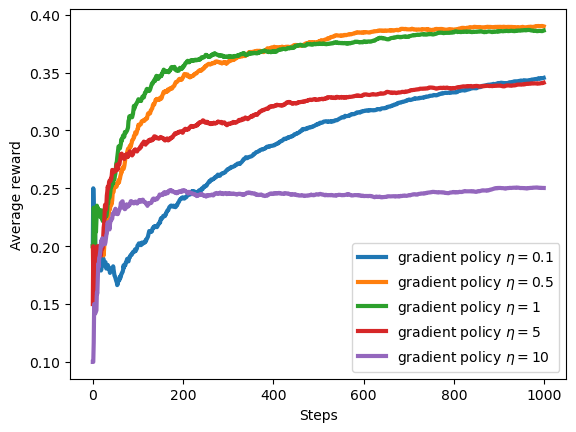

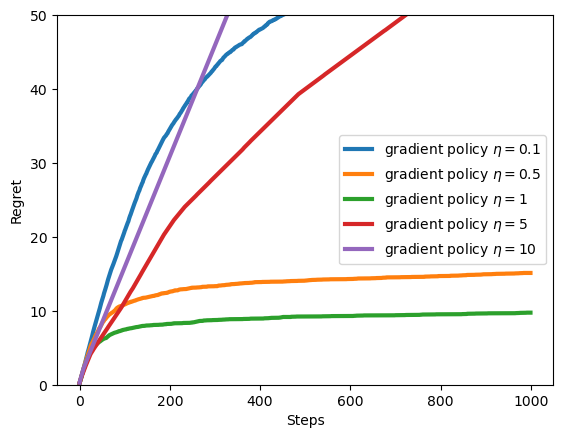

In [4]:
plot_rewards(rewards_gradient, timesteps)
plot_regrets(regrets_gradient)